In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

In [2]:
# File paths (adjust these paths as needed)
test_dataset_path = r"D:/Krish/Downloads/project/dataset/medicinal_herbs_adulteration_detailed_spectral_dataset_testing.csv"
model_path = r"D:/Krish/Downloads/project/SavedModels/RandomForest/random_forest_best_model.pkl"
scaler_path = r"D:/Krish/Downloads/project/SavedModels/RandomForest/scaler.pkl"

In [3]:
# Load the testing dataset
test_df = pd.read_csv(test_dataset_path)

In [4]:
test_df.head()

,Sample_ID,Herb_Name,Adulterant_Present,Adulterant_Type,Adulteration_Level,Spectral_Data
0,1,Ginkgo Biloba,1,Talc,3,"0.7292469127300953,0.48416010821293964,1.11852..."
1,2,Ginkgo Biloba,0,NotPresent,0,"0.2954289894955562,0.47539994255888507,0.45720..."
2,3,Turmeric,0,NotPresent,0,"0.42558845768485265,0.837625426092819,0.502812..."
3,4,Ashwagandha,1,Chicory,37,"1.1311184612231056,0.09401551934943209,0.23712..."
4,5,Echinacea,1,Metanil Yellow,15,"1.1291965723214568,0.03587063391311007,1.47784..."


In [5]:
# Convert Spectral_Data from string to numeric arrays
test_df["Spectral_Data"] = test_df["Spectral_Data"].astype(str)
X_spectral = np.array(test_df["Spectral_Data"].str.split(",").apply(lambda x: list(map(float, x))).tolist())

In [6]:
# Combine Spectral_Data and Adulteration_Level as features
X_test = np.hstack((X_spectral, test_df["Adulteration_Level"].values.reshape(-1, 1)))

# Define the target variable
y_test = test_df["Adulterant_Present"].values

# Load the scaler and model
scaler = joblib.load(scaler_path)
model = joblib.load(model_path)

In [7]:
# Standardize the features
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2%}")

Test Set Accuracy: 100.00%


In [8]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Adulterated", "Adulterated"]))


Classification Report:
                 precision    recall  f1-score   support

Not Adulterated       1.00      1.00      1.00       100
    Adulterated       1.00      1.00      1.00       100

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200



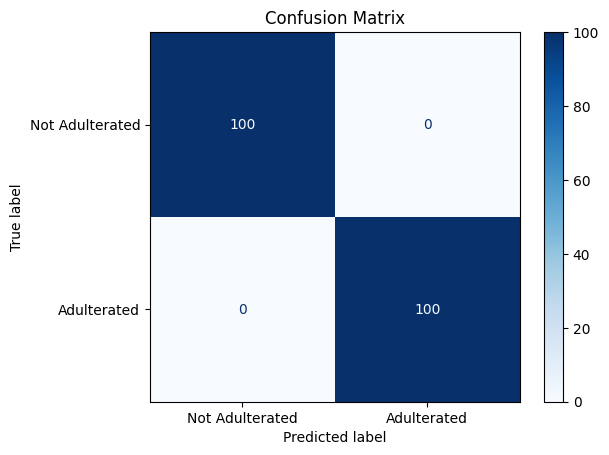

In [9]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Adulterated", "Adulterated"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

AUC Score: 1.00


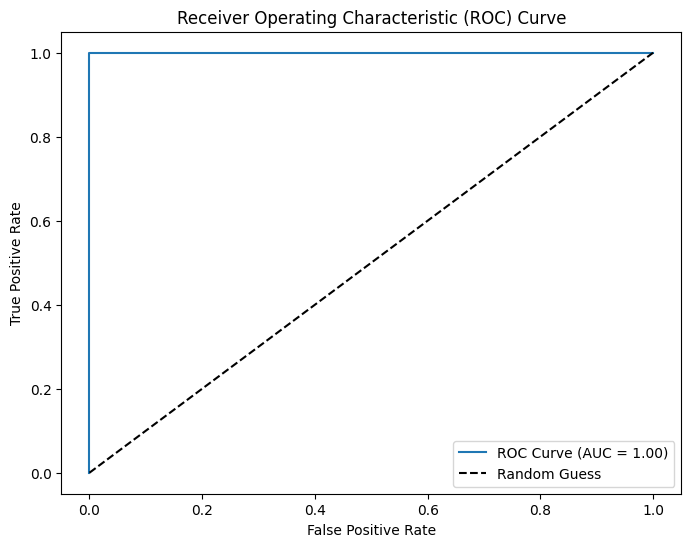

In [10]:
# 1. ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

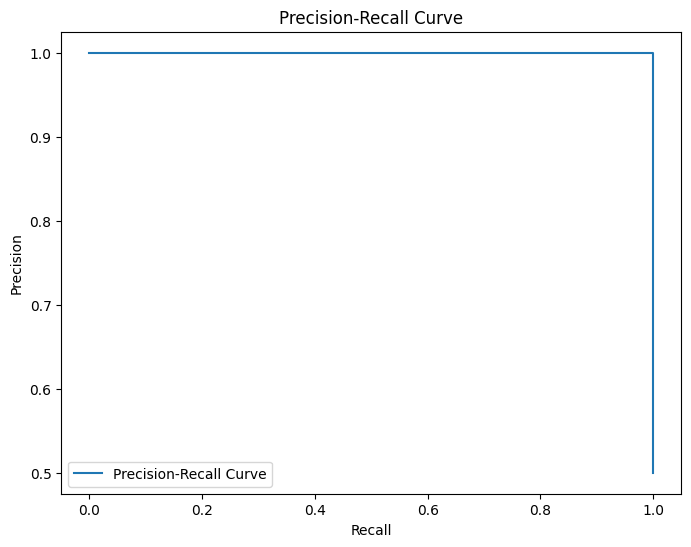

In [11]:
# 2. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

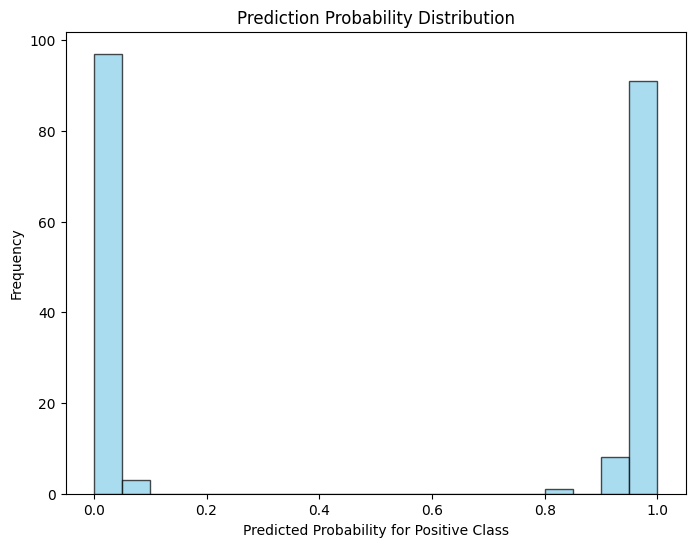

In [12]:
# 3. Prediction Probability Histogram
plt.figure(figsize=(8, 6))
plt.hist(y_proba, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability for Positive Class")
plt.ylabel("Frequency")
plt.show()
